In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import itertools
import statsmodels.api as sm

In [3]:
df = pd.read_csv('/Users/VarinderSingh/Downloads/Crime_Data.csv')

In [4]:
df.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
1,1976000069169,01/01/1976,1.0,01/31/1976,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
2,1979000049118,01/28/1979,1600.0,02/09/1979,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,08/22/1981,2029.0,08/22/1981,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,02/14/1981,2000.0,02/15/1981,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
df.shape

(523590, 11)

In [7]:
df.dtypes

Report Number                    int64
Occurred Date                   object
Occurred Time                  float64
Reported Date                   object
Reported Time                  float64
Crime Subcategory               object
Primary Offense Description     object
Precinct                        object
Sector                          object
Beat                            object
Neighborhood                    object
dtype: object

In [8]:
print(df.isnull().sum())

Report Number                     0
Occurred Date                     2
Occurred Time                     2
Reported Date                     0
Reported Time                     2
Crime Subcategory               262
Primary Offense Description       0
Precinct                          6
Sector                         3346
Beat                           3298
Neighborhood                      0
dtype: int64


In [9]:
df = df.dropna()
df.shape

(519975, 11)

In [10]:
print(df.isnull().sum())

Report Number                  0
Occurred Date                  0
Occurred Time                  0
Reported Date                  0
Reported Time                  0
Crime Subcategory              0
Primary Offense Description    0
Precinct                       0
Sector                         0
Beat                           0
Neighborhood                   0
dtype: int64


In [11]:
df.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
2,1979000049118,01/28/1979,1600.0,02/09/1979,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,08/22/1981,2029.0,08/22/1981,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,02/14/1981,2000.0,02/15/1981,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS
5,19880000507482,09/29/1988,155.0,09/29/1988,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE


In [12]:
offenses = df[['Primary Offense Description']]

In [13]:
offenses.head()

,Primary Offense Description
0,BURGLARY-FORCE-RES
2,THEFT-CARPROWL
3,HOMICIDE-PREMEDITATED-WEAPON
4,BURGLARY-FORCE-RES
5,VEH-THEFT-AUTO


In [14]:
offenses_count = pd.DataFrame(offenses.groupby('Primary Offense Description').size().sort_values(ascending=False).rename('Occurences').reset_index())

In [15]:
offenses_count.head()

,Primary Offense Description,Occurences
0,THEFT-CARPROWL,130733
1,THEFT-SHOPLIFT,48607
2,THEFT-OTH,46898
3,VEH-THEFT-AUTO,37763
4,BURGLARY-FORCE-RES,27946


In [16]:
df.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
2,1979000049118,01/28/1979,1600.0,02/09/1979,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,08/22/1981,2029.0,08/22/1981,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,02/14/1981,2000.0,02/15/1981,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS
5,19880000507482,09/29/1988,155.0,09/29/1988,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE


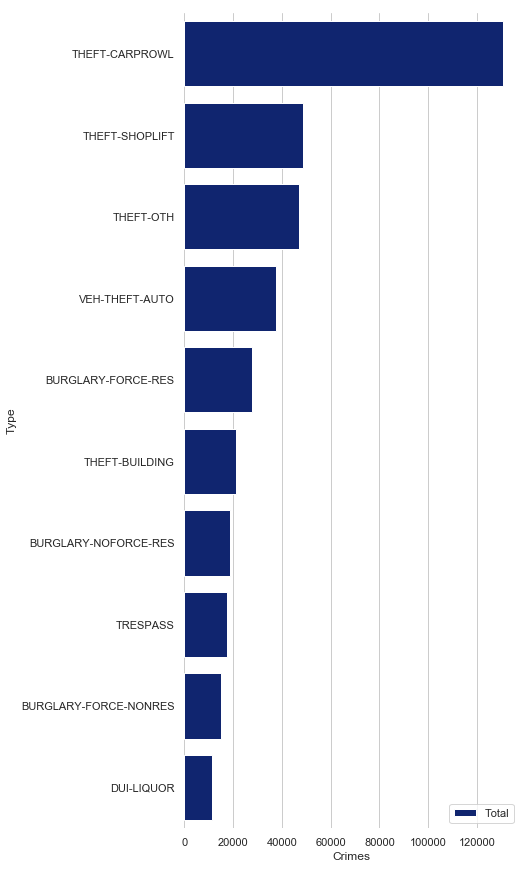

In [17]:
sns.set(style="whitegrid")


f, ax = plt.subplots(figsize=(6, 15))



sns.set_color_codes("dark")
sns.barplot(x="Occurences", y="Primary Offense Description", data=offenses_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

plt.show()
plt.rcParams["figure.figsize"] = (2,2)

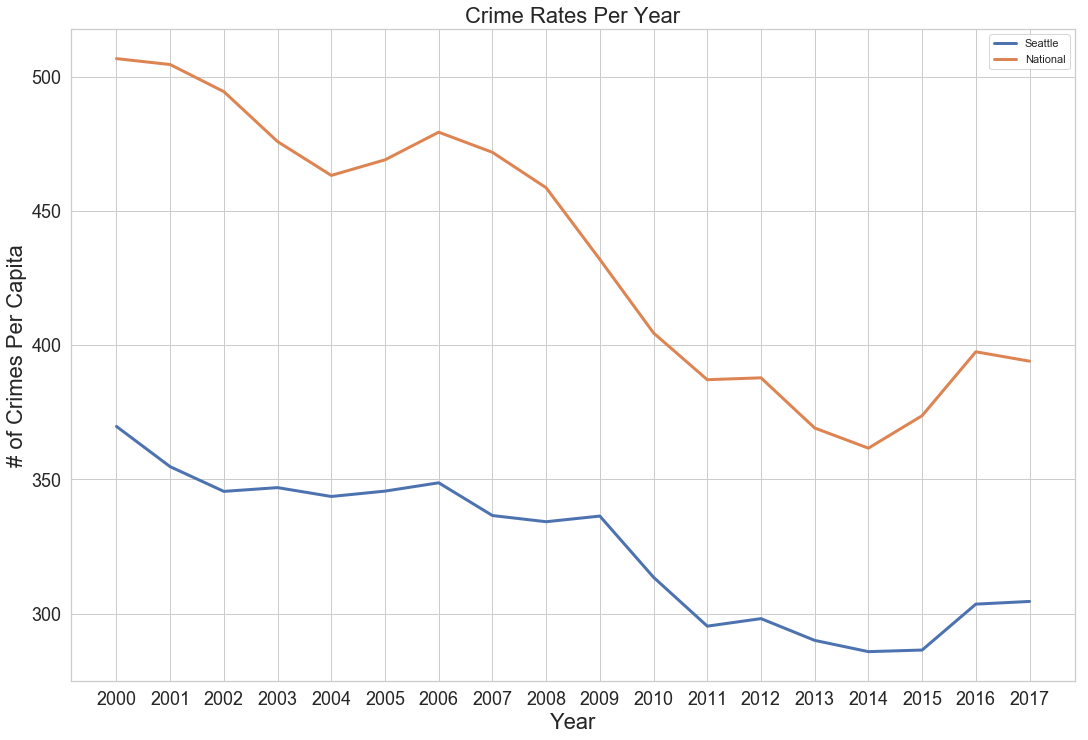

In [19]:
#Plotting the national vs Washington Per capita crime rate
x = [369.7, 354.7, 345.5, 346.9, 343.6, 345.6, 348.7, 336.5, 334.2, 336.3, 313.5, 295.3, 298.1, 290, 285.8, 286.4, 303.5, 304.5]
x2 = [506.7, 504.5, 494.4, 475.8, 463.2, 469, 479.3, 471.8, 458.6,  431.9, 404.5, 387.1, 387.8, 369.1, 361.6, 373.7, 397.5, 394]
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
plt.plot(years, x, linewidth = 3.0, label = 'Seattle')
plt.plot(years, x2, linewidth = 3.0, label= 'National')
pylab.legend(loc='upper right')
plt.xlabel('Year', fontsize = 22)
plt.ylabel('# of Crimes Per Capita', fontsize = 22)
plt.title('Crime Rates Per Year', fontsize = 22)
plt.xticks(np.arange(2000, 2018, 1,))
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()
plt.rcParams["figure.figsize"] = (20,12)
            

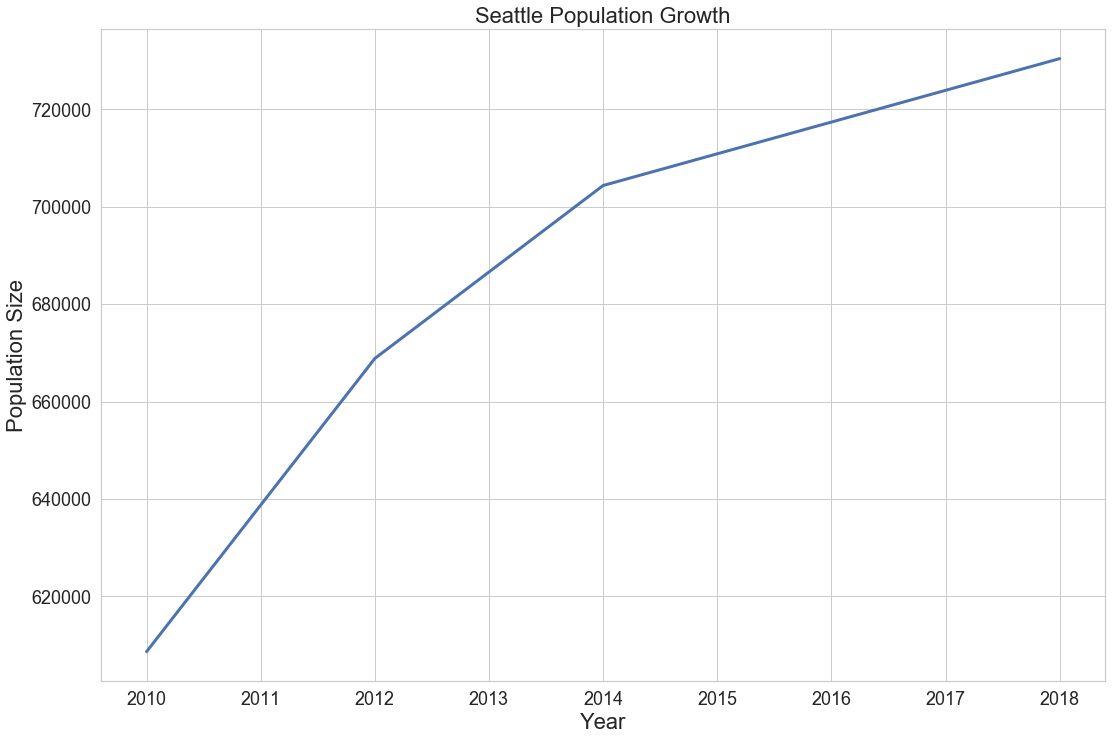

In [18]:
#Plotting Seattle's population growth since 2010
x = [608660, 668849, 704352, 730400]
y = [2010, 2012, 2014, 2018]
plt.plot(y, x, linewidth = 3.0)
plt.xlabel('Year', fontsize = 22)
plt.ylabel('Population Size', fontsize = 22)
plt.title('Seattle Population Growth', fontsize = 22)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()
plt.rcParams["figure.figsize"] = (18,12)

In [19]:
df.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
2,1979000049118,01/28/1979,1600.0,02/09/1979,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,08/22/1981,2029.0,08/22/1981,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,02/14/1981,2000.0,02/15/1981,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS
5,19880000507482,09/29/1988,155.0,09/29/1988,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE


In [20]:
#Renaming the columns to more correct syntax
df.rename(columns={'Report Number':'Report_Number'}, inplace=True)
df.rename(columns={'Occurred Date':'Occurred_Date'}, inplace=True)
df.rename(columns = {'Occurred Time':'Occurred_Time'}, inplace=True)
df.rename(columns={'Reported Date':'Reported_Date'}, inplace=True)
df.rename(columns={'Reported Time':'Reported_Time'}, inplace=True)
df.rename(columns = {'Crime Subcategory':'Crime_Subcategory'}, inplace=True)
df.rename(columns = {'Primary Offense Description':'Primary_Offense_Description'}, inplace=True)

In [21]:
df.head()

,Report_Number,Occurred_Date,Occurred_Time,Reported_Date,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
2,1979000049118,01/28/1979,1600.0,02/09/1979,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,08/22/1981,2029.0,08/22/1981,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,02/14/1981,2000.0,02/15/1981,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS
5,19880000507482,09/29/1988,155.0,09/29/1988,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE


In [22]:
#Finding the range of time 
df['Occurred_Date'].min(),df['Occurred_Date'].max()

('01/01/1973', '12/31/2018')

In [23]:
#Changing the occured date to correct format
df['Occurred_Date'] = pd.to_datetime(df['Occurred_Date'], infer_datetime_format = True)
indexeddf = df.set_index(['Occurred_Date'])

In [24]:
df.head()

,Report_Number,Occurred_Date,Occurred_Time,Reported_Date,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,1975-12-16,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
2,1979000049118,1979-01-28,1600.0,02/09/1979,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,1981-08-22,2029.0,08/22/1981,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,1981-02-14,2000.0,02/15/1981,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS
5,19880000507482,1988-09-29,155.0,09/29/1988,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE


In [25]:
df1 = df

In [26]:
df1.head()

,Report_Number,Occurred_Date,Occurred_Time,Reported_Date,Reported_Time,Crime_Subcategory,Primary_Offense_Description,Precinct,Sector,Beat,Neighborhood
0,1975000079415,1975-12-16,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
2,1979000049118,1979-01-28,1600.0,02/09/1979,1430.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
3,19810000305573,1981-08-22,2029.0,08/22/1981,2030.0,HOMICIDE,HOMICIDE-PREMEDITATED-WEAPON,SOUTH,S,S2,BRIGHTON/DUNLAP
4,1981000076456,1981-02-14,2000.0,02/15/1981,435.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTHWEST,W,W3,ROXHILL/WESTWOOD/ARBOR HEIGHTS
5,19880000507482,1988-09-29,155.0,09/29/1988,155.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,WEST,M,M2,SLU/CASCADE


In [27]:
#Removing the columns I did not need to do time series analysis
cols = ['Occurred_Time','Reported_Date','Reported_Time','Crime_Subcategory','Report_Number',
       'Precinct','Sector','Beat','Neighborhood']
df1.drop(cols, axis=1, inplace = True)

In [28]:
from fbprophet import Prophet

In [29]:
df1.head()

,Occurred_Date,Primary_Offense_Description
0,1975-12-16,BURGLARY-FORCE-RES
2,1979-01-28,THEFT-CARPROWL
3,1981-08-22,HOMICIDE-PREMEDITATED-WEAPON
4,1981-02-14,BURGLARY-FORCE-RES
5,1988-09-29,VEH-THEFT-AUTO


In [30]:
#Setting the count to the number of occurances for offenses by date
df1 = df1.groupby('Occurred_Date').count()['Primary_Offense_Description'].to_frame()
df1.reset_index(inplace=True)
df1.columns = ['ds','y']

In [31]:
df1.head()

,ds,y
0,1908-12-13,1
1,1964-06-15,1
2,1973-01-01,1
3,1975-12-16,1
4,1978-01-01,1


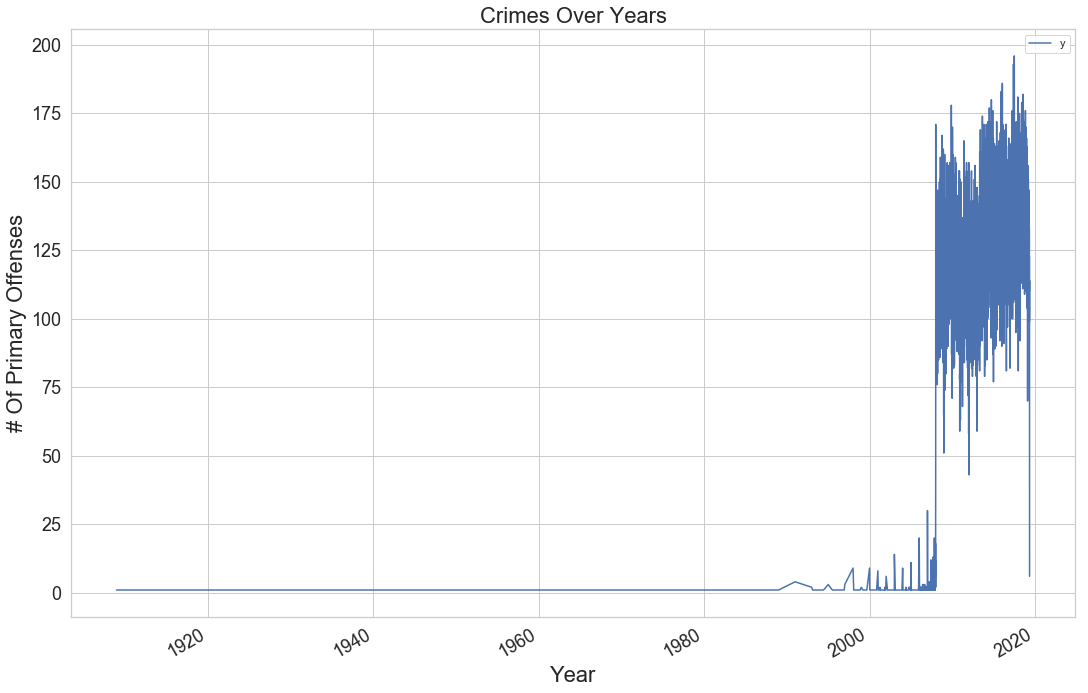

In [32]:
#Plotting crimes over the years
df1.plot(x='ds')
plt.xlabel('Year', fontsize = 22)
plt.ylabel('# Of Primary Offenses', fontsize = 22)
plt.title('Crimes Over Years', fontsize = 22)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()
plt.rcParams["figure.figsize"] = (20,15)

In [33]:
df1.isnull().sum()

ds    0
y     0
dtype: int64

In [34]:
df1.head()

,ds,y
0,1908-12-13,1
1,1964-06-15,1
2,1973-01-01,1
3,1975-12-16,1
4,1978-01-01,1


In [35]:
#Running the first model prior to removing outliers
m1_plain = Prophet()
m1_plain.fit(df1)


future = m1_plain.make_future_dataframe(periods=365)
forecast_m1 = m1_plain.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



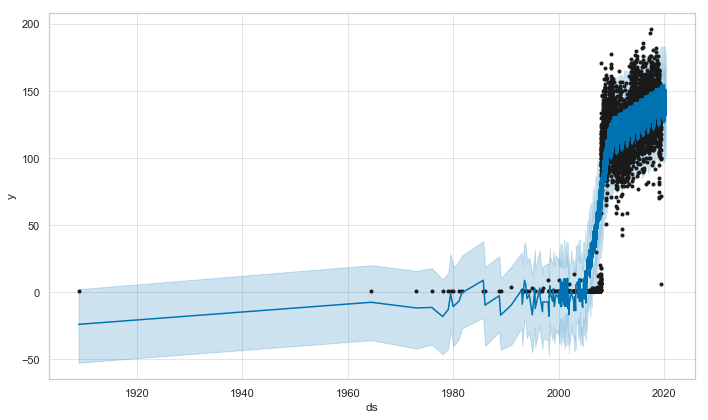

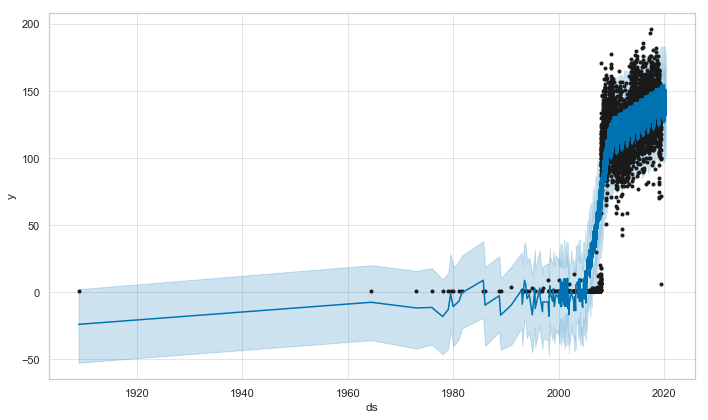

In [36]:
m1_plain.plot(forecast_m1)

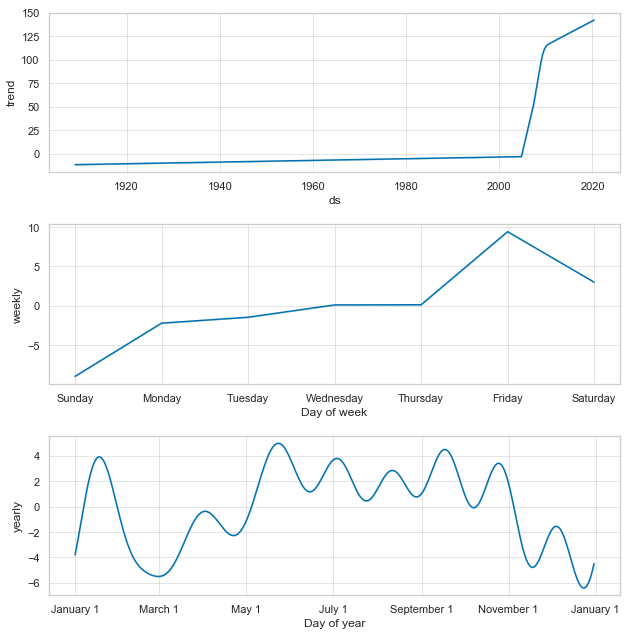

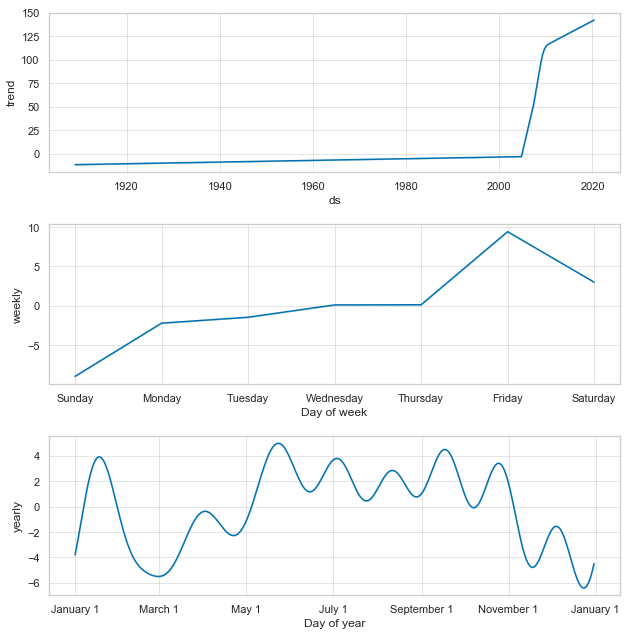

In [37]:
#Getting individual components
m1_plain.plot_components(forecast_m1)

In [38]:
df2 = df1

In [39]:
#I ran this line but found for some reason the values were still there after the slicing
#df2.loc[~df2.index.isin(df2.index[df2.index.slice_indexer('1908-12-13', '2000-1-1')])]

In [40]:
df2.head()

,ds,y
0,1908-12-13,1
1,1964-06-15,1
2,1973-01-01,1
3,1975-12-16,1
4,1978-01-01,1


In [41]:
#df2[df2.ds != '1908-12-13']
#df2[df2.ds != '1964-06-15']

In [42]:
df_m2 = df2.copy()

In [43]:
df_m2.head()

,ds,y
0,1908-12-13,1
1,1964-06-15,1
2,1973-01-01,1
3,1975-12-16,1
4,1978-01-01,1


In [47]:
df_m2['y'] = np.log(df_m2['y'])

In [48]:
#Setting the upper and lower control limit to 3 standard deviations.
ucl = df_m2.mean() + df_m2.std()*3
lcl = df_m2.mean() - df_m2.std()*3

In [49]:
#We have 329 entries below standar deviations.
print('Above 3 standard deviations: ', df_m2[df_m2['y'] > ucl['y']]['y'].count(), 'entries')
print('Below 3 standard deviations: ', df_m2[df_m2['y'] < lcl['y']]['y'].count(), 'entries')

Above 3 standard deviations:  0 entries
Below 3 standard deviations:  327 entries


In [50]:
#Replacing these 327 entries with the none so I could drop them from the data
df_m2.loc[df_m2['y'] > ucl['y'], 'y'] = None
df_m2.loc[df_m2['y'] < lcl['y'], 'y'] = None

In [51]:
df_m2.head()

,ds,y
0,1908-12-13,NaN
1,1964-06-15,NaN
2,1973-01-01,NaN
3,1975-12-16,NaN
4,1978-01-01,NaN


In [52]:
df_m2.dropna(inplace = True)

In [55]:
#The data now starts from 1991 rather than 1908
df_m2.head()

,ds,y
14,1991-01-01,1.386294
15,1993-01-01,0.693147
21,1995-01-01,1.098612
27,1997-01-01,1.098612
28,1998-01-01,2.197225


In [53]:
m1_plain = Prophet()
m1_plain.fit(df_m2)


future = m1_plain.make_future_dataframe(periods=365)
forecast_m1 = m1_plain.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


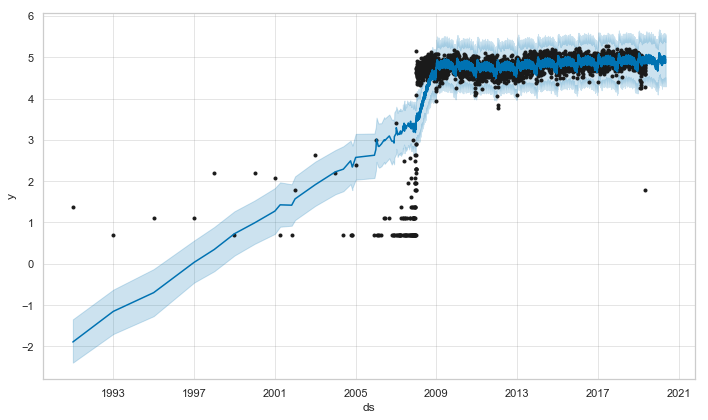

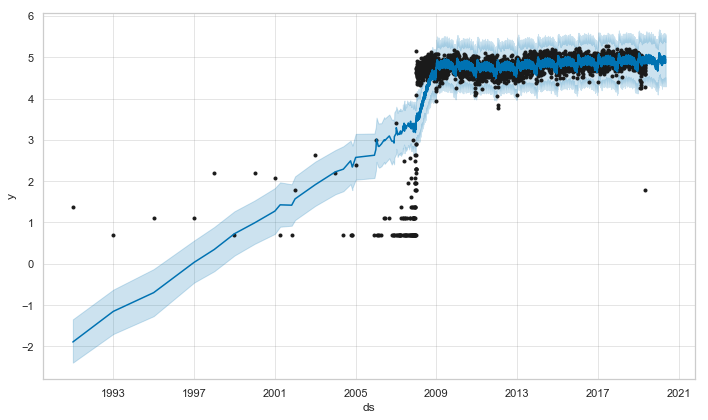

In [54]:
m1_plain.plot(forecast_m1)

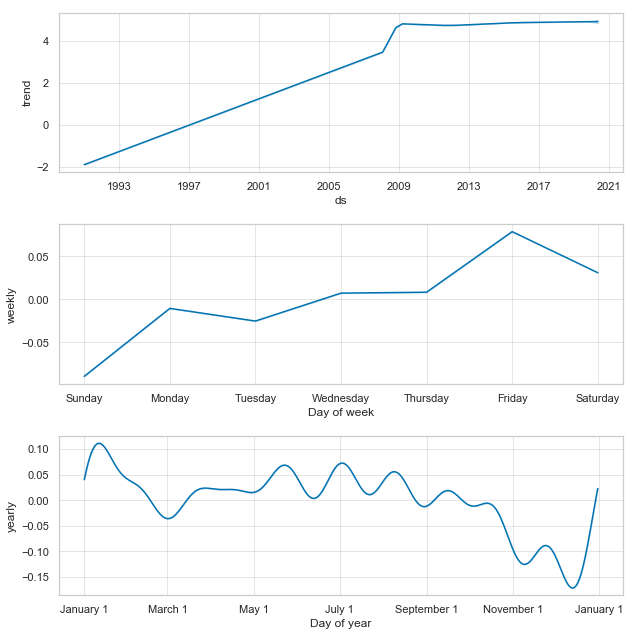

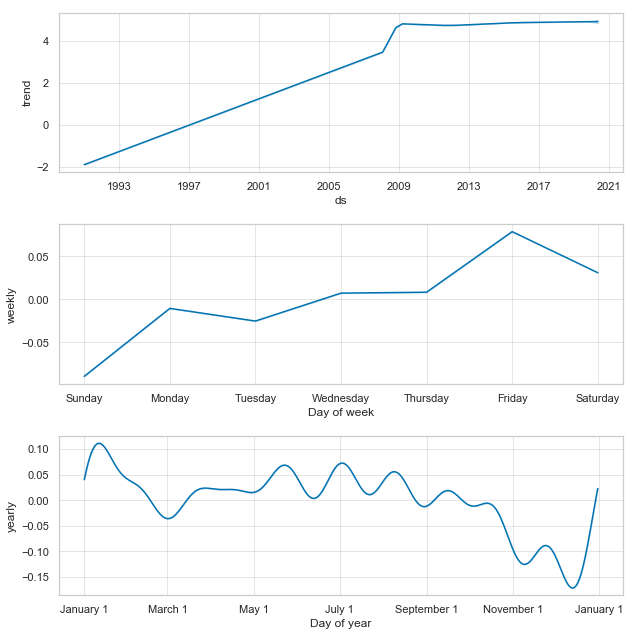

In [56]:
m1_plain.plot_components(forecast_m1)